# LANGUAGE MODELING WITH LSTM

<center>This project is an NLP project for word prediction, the model will predict the next work in a sentence. The data set is the Penn Treebank data set which contains lots correct English sentences. The data set contains training, testing and validation set, which we are going to use the training set for training and the testing set for validation. We will divide the data set into 20 word per sentence, i.e each sequence will contain 20 time steps. So we go over the training and analyze the training performance and  the validation performance. we will be using tensorflow library<center>

In [2]:
#install updated version of our library
!pip install tensorflow==2.11.0
!pip install numpy==1.21.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 804.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 44.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 40.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 

In [1]:
import time
import numpy as np
import tensorflow as tf
print(tf.__version__ )

2023-10-13 06:29:57.944112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 06:29:58.112955: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-13 06:29:58.118329: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-13 06:29:58.118382: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2.11.0


In [2]:
# importing neccessary packages
import matplotlib.pyplot as plt
import collections
import os

import numpy as np
import tensorflow as tf

Writting a function to get our data set from the directory, the function will return a list which contains every sentence in numbers, i.e each word is represented with a number which is its index and a dictionary which contains each word as key and index as value

In [4]:
def get_data(filename):
    #define the directory to get our data set
    train_path = os.path.join(data_dir, filename)
    #read our data from the directory and replace every new line with <eos>, (end of sentence)
    with tf.io.gfile.GFile(train_path, "r") as f:
        file=f.read().replace("\n", "<eos>").split()
    #arrang each word in our data set according to their indexes
    counter = collections.Counter(file)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))
    words, count = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))
    sen_no= [word_to_id[word] for word in file if word in word_to_id]
    
    return sen_no, word_to_id


we can now get our data set according to the indexes of each word and every sentence in the data set represented in numbers.

In [5]:
data_dir = "data/simple-examples/data/"

#train data set
train_sen_no, train_word_to_id = get_data('ptb.train.txt')
#validation data set
va_sen_no, val_word_to_id = get_data('ptb.valid.txt')
#testing set
test_va_sen_no, test_val_word_to_id = get_data('ptb.test.txt')
#get lenght of the word id 
len(train_word_to_id), len(train_sen_no)

(10000, 929589)

write a function to transform the sentence to words from numbers

In [6]:
def id_to_word(vocab, id_list):
    line = []
    for w in id_list:
        for word, wid in vocab.items():
            if wid == w:
                line.append(word)
    return line            
                

In [7]:
# the first 100 words
words_no=train_sen_no[0:100]
#print the first 100 words
print(np.reshape(words_no, (1, -1)))

[[9970 9971 9972 9974 9975 9976 9980 9981 9982 9983 9984 9986 9987 9988
  9989 9991 9992 9993 9994 9995 9996 9997 9998 9999    2 9256    1    3
    72  393   33 2133    0  146   19    6 9207  276  407    3    2   23
     1   13  141    4    1 5465    0 3081 1596   96    2 7682    1    3
    72  393    8  337  141    4 2477  657 2170  955   24  521    6 9207
   276    4   39  303  438 3684    2    6  942    4 3150  496  263    5
   138 6092 4241 6036   30  988    6  241  760    4 1015 2786  211    6
    96    4]]


In [8]:
# getting the it in alphabetic form
np.reshape(id_to_word(train_word_to_id, words_no), (1,-1))

array([['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett',
        'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia',
        'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens',
        'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>',
        'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the',
        'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N',
        '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.',
        'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph',
        '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of',
        'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a',
        'nonexecutive', 'director', 'of', 'this', 'british',
        'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of',
        'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette',
        'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of',
        'cancer', 'de

define a function to get an itrator for our data set. the function will return an itrator which contains our data set in batch size and time step

In [9]:
def loader(file, batch_size,num_steps):
    raw_data = np.array(file, dtype=np.int32)
    data_len = len(raw_data)
    batch_len = data_len // batch_size
    data = np.zeros([batch_size, batch_len], dtype=np.int32)
    for i in range(batch_size):
        data[i] = raw_data[batch_len * i:batch_len * (i + 1)]
        
    epoch_size = (batch_len - 1) // num_steps
    for i in range(epoch_size):
        x = data[:, i*num_steps:(i+1)*num_steps]
        y = data[:, i*num_steps+1:(i+1)*num_steps+1]
        
        yield(x, y)

In [10]:
# using our itrator loader to get  generrate our data set in 30 batches and 20 time steps
load=loader(train_sen_no,30, 20)


In [11]:
test_itter=loader(test_va_sen_no, 30, 30)

In [12]:
# get the first training batch
first_touple = load.__next__()
features = first_touple[0]
targets = first_touple[1]

In [13]:
targets.shape

(30, 20)

Defining embedding layer for our model. each word will have 200 embedding vectors

In [14]:
batch_size=30
num_steps=20
# set device to cpu since we dont have gpu
with tf.device("/cpu:0"):
    embedding = tf.keras.layers.Embedding(len(train_word_to_id), 200,batch_input_shape=(batch_size, num_steps),trainable=True,name="embedding_vocab")
#pass the first batch to the embedding layer 
model_input=embedding(features)

2023-10-13 06:30:42.256162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-13 06:30:42.256262: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-13 06:30:42.256307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-jchibuike75): /proc/driver/nvidia/version does not exist
2023-10-13 06:30:42.258265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# get the shape of the output of the embedding layer
model_input.shape

TensorShape([30, 20, 200])

Defining the LSTM cells and stacking them to build our model

In [16]:
lstm_cell_l1 = tf.keras.layers.LSTMCell(200)
lstm_cell_l2 = tf.keras.layers.LSTMCell(128)
stacked_lstm = tf.keras.layers.StackedRNNCells([lstm_cell_l1, lstm_cell_l2])
layer  =  tf.keras.layers.RNN(stacked_lstm,[30, 20],return_state=False,stateful=True,trainable=True)

In [17]:
#initializing our rnn  initial state to zeros
init_state = tf.Variable(tf.zeros([30,200]),trainable=False)
layer.inital_state = init_state

Input the output of our embedding layer to our RNN layer

In [18]:
# pass the ouput of embedding layer to RNN layer
rnn_out_put=layer(model_input)
rnn_out_put.shape

TensorShape([30, 20, 128])

build fully connected layer and the output is 1000 which represents each word in the word id

In [19]:
#define dense layer
dense = tf.keras.layers.Dense(10000)

In [20]:
#pass the output of the RNN layer to the fully connected layer
densed_output=dense(rnn_out_put)
densed_output.shape

TensorShape([30, 20, 10000])

In [21]:
#define a sofmax function
activation = tf.keras.layers.Activation('softmax')

In [22]:
# pass the output of the fully connected layer to get the probability of each word
prob= activation(densed_output)
prob.shape

TensorShape([30, 20, 10000])

In [23]:
#use argmax function to get the predicted words for the third sequence
yhat=np.argmax(prob[3,0:20], axis=1)
yhat

array([7954, 8321,  439, 9755, 7146, 7146, 9166, 9166, 9166, 9166, 9166,
       9166, 5360, 5360, 5614, 5614, 5614, 5614, 5614, 5417])

In [24]:
# get the predicted words in alpherbets
np.reshape(id_to_word(train_word_to_id, yhat), (1,-1))

array([['confused', 'practitioners', 'record', 'nonsense', 'slack',
        'slack', 'mink', 'mink', 'mink', 'mink', 'mink', 'mink',
        'daughter', 'daughter', 'chugai', 'chugai', 'chugai', 'chugai',
        'chugai', 'highways']], dtype='<U13')

In [25]:
# get the actual word
np.reshape(id_to_word(train_word_to_id, targets[3]), (1,-1))

array([['shares', 'of', 'its', 'common', 'stock', 'for', 'each', 'of',
        '<unk>', 'deposit', "'s", 'N', 'shares', 'outstanding', '<eos>',
        'liberty', 'national', 'a', 'bank', 'holding']], dtype='<U11')

In [26]:
#define a function to calculate our crossentropy loss
def crossentropy(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

In [27]:
targets.shape, prob.shape

((30, 20), TensorShape([30, 20, 10000]))

In [28]:
# calculate the loss of our model output with respect to the actual value
loss=crossentropy(targets, prob)
loss.shape

TensorShape([30, 20])

In [29]:
#calculate the average loss of our prediction
cost = tf.reduce_sum(loss) / batch_size
cost

<tf.Tensor: shape=(), dtype=float32, numpy=184.20703>

In [30]:
# define a variable for our learning rate
lr = tf.Variable(0.0, trainable=False)
# set our optimizer (gradient decent)
optimizer = tf.keras.optimizers.SGD(lr=lr, clipnorm=5)

In [31]:
print(optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [32]:
# set our learning rate to 1.0
K = tf.keras.backend 
K.set_value(optimizer.learning_rate,1.0)

In [33]:
# checking if the learning rate was properly set
optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>

we can now build our model

In [34]:
model=tf.keras.Sequential()
model.add(embedding)
model.add(layer)
model.add(dense)
model.add(activation)
model.compile(loss=crossentropy, optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_vocab (Embedding)  (30, 20, 200)            2000000   
                                                                 
 rnn (RNN)                   (30, 20, 128)             495248    
                                                                 
 dense (Dense)               (30, 20, 10000)           1290000   
                                                                 
 activation (Activation)     (30, 20, 10000)           0         
                                                                 
Total params: 3,785,248
Trainable params: 3,779,248
Non-trainable params: 6,000
_________________________________________________________________


In [35]:
# testing our model by passing the first batch along with the time taken in second
start=time.time()
yhat=model(features)
finish=time.time()
total=finish-start
print(total, yhat.shape)

0.23740863800048828 (30, 20, 10000)


In [36]:
#inspecting our tainable paremeters
tvars = model.trainable_variables
for i in tvars:
    print(i.name, i.shape)

embedding_vocab/embeddings:0 (10000, 200)
rnn/stacked_rnn_cells/lstm_cell/kernel:0 (200, 800)
rnn/stacked_rnn_cells/lstm_cell/recurrent_kernel:0 (200, 800)
rnn/stacked_rnn_cells/lstm_cell/bias:0 (800,)
rnn/stacked_rnn_cells/lstm_cell_1/kernel:0 (200, 512)
rnn/stacked_rnn_cells/lstm_cell_1/recurrent_kernel:0 (128, 512)
rnn/stacked_rnn_cells/lstm_cell_1/bias:0 (512,)
dense/kernel:0 (128, 10000)
dense/bias:0 (10000,)


<b>Training phase. </b> defining a function the train our training set and analyzing the the training loss and the perplexity. In the training phase, the learning rate was set to decay when a particular threshold is reached and we also applied max_grad_norm to clip our gradients to avoid exploding gradients problems

In [37]:
train_epoc_cost_list=[]
train_perplexity_list=[]
def train(epoc_size):
    
    
    # epoc itration
    for i in range(epoc_size):
        print('epoc {} begins'.format(i+1))
        epoc_cost_list=[]
        perplexity_list=[]
        load=loader(train_sen_no,30, 20)
        #define decay condtion
        if epoc_size >= max_epoch_decay_lr:
            lr_decay = decay ** max(i - max_epoch_decay_lr, 0.0)
            dcr = learning_rate * lr_decay
            K.set_value(model.optimizer.learning_rate,dcr)
        learning_r= model.optimizer.learning_rate
        print('epoc {} learning rate is {}'.format(i+1, learning_r))
        epoc_cost=0
        itter=0
        couter=0
        # batch training
        for batch in load:
            x=batch[0]
            y=batch[1]
            with tf.GradientTape() as tape:
                prob = model(x)
                loss  = crossentropy(y, prob)
                cost = tf.reduce_sum(loss,axis=0) / batch_size
                batch_cost= tf.reduce_sum(loss) / batch_size
                
            #calculate gradient
            grad_t_list = tape.gradient(cost, tvars)
            #clip gradients
            grads, _ = tf.clip_by_global_norm(grad_t_list, max_grad_norm)
            #update our parameters with respect to gradient
            train_op = optimizer.apply_gradients(zip(grads, tvars))
            #append train loss
            train_epoc_cost_list.append(batch_cost)
            epoc_cost_list.append(batch_cost)
            # count loss
            epoc_cost+=batch_cost
            itter+=20
            #calculate perplexity
            perplexity= np.exp(epoc_cost/itter)
            perplexity_list.append(perplexity)
            train_perplexity_list.append(perplexity)
            
            #print perplexity for every 500 batches
            if couter % 500==0:
                print('perplexity is {}'.format(perplexity))
            couter+=1
        print('epoc {} completed'.format(i+1))
        print('epoc {} final perplexity is {}'.format(i+1, perplexity))
         
            #vizualize a plot of out training loss and perplexity for every epoc
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[ 0].plot(np.array(epoc_cost_list))
        axes[ 0].set_title('epoc cost')
        axes[ 0].set_xlabel('batches')
        axes[ 0].set_ylabel('cost')
        axes[ 0].grid(True)
        
        axes[ 1].plot(np.array(perplexity_list))
        axes[ 1].set_title('perplexity plot')
        axes[ 1].set_xlabel('batches')
        axes[ 1].set_ylabel('perplexity')
        axes[ 1].grid(True)
            
            
        plt.tight_layout()
        plt.show()
        
  

Train the model with 10 epocs and learning rate of 1.0 which learning rate will start decaying at max epoc of 7

epoc 1 begins
epoc 1 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 10000.306640625
perplexity is 682.801513671875
perplexity is 457.191162109375
perplexity is 366.65618896484375
epoc 1 completed
epoc 1 final perplexity is 361.19610595703125


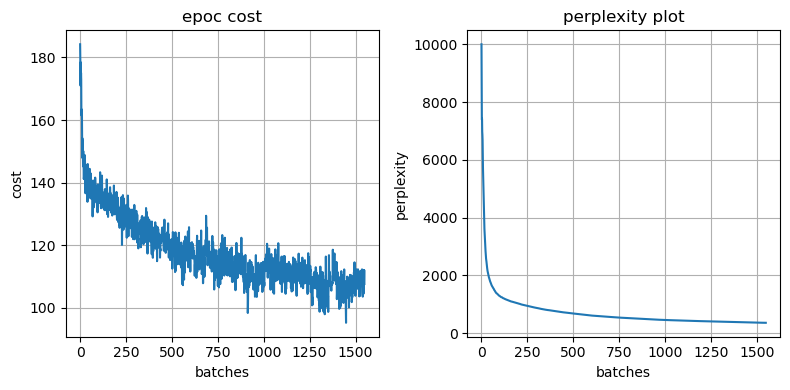

epoc 2 begins
epoc 2 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 313.3619079589844
perplexity is 196.21258544921875
perplexity is 177.9121856689453
perplexity is 168.1423797607422
epoc 2 completed
epoc 2 final perplexity is 167.7147216796875


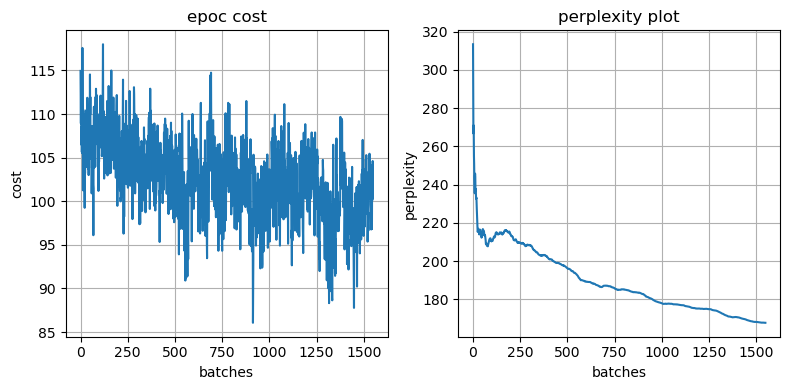

epoc 3 begins
epoc 3 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 238.3187255859375
perplexity is 140.78147888183594
perplexity is 132.01304626464844
perplexity is 127.65945434570312
epoc 3 completed
epoc 3 final perplexity is 127.64655303955078


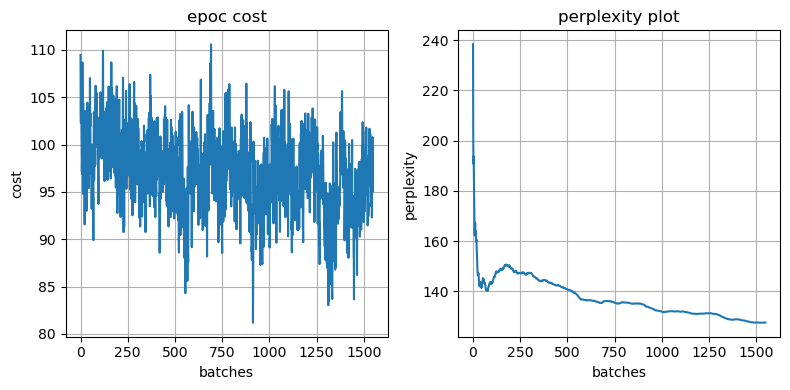

epoc 4 begins
epoc 4 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 198.49110412597656
perplexity is 116.03600311279297
perplexity is 110.10260009765625
perplexity is 107.37380981445312
epoc 4 completed
epoc 4 final perplexity is 107.47682189941406


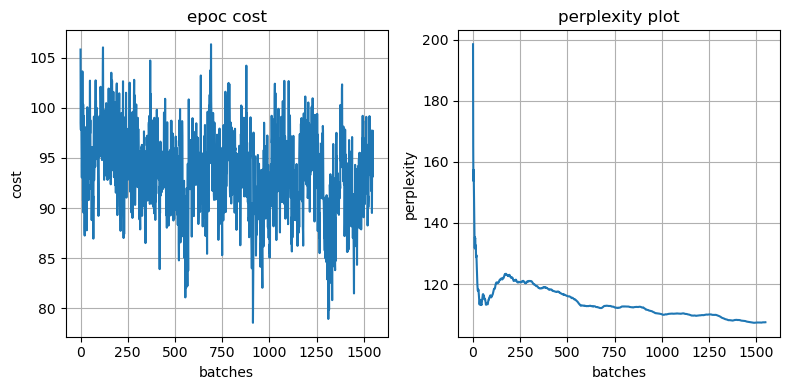

epoc 5 begins
epoc 5 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 187.68392944335938
perplexity is 101.43097686767578
perplexity is 96.75634765625
perplexity is 94.87097930908203
epoc 5 completed
epoc 5 final perplexity is 95.0274887084961


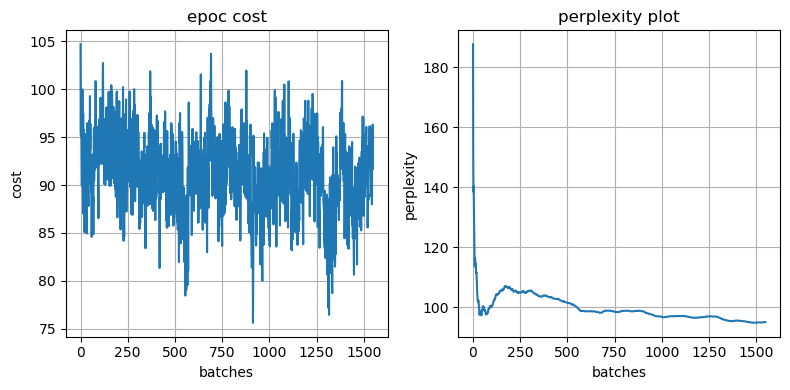

epoc 6 begins
epoc 6 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.0>
perplexity is 168.1160125732422
perplexity is 91.89695739746094
perplexity is 88.06784057617188
perplexity is 86.70205688476562
epoc 6 completed
epoc 6 final perplexity is 86.8690414428711


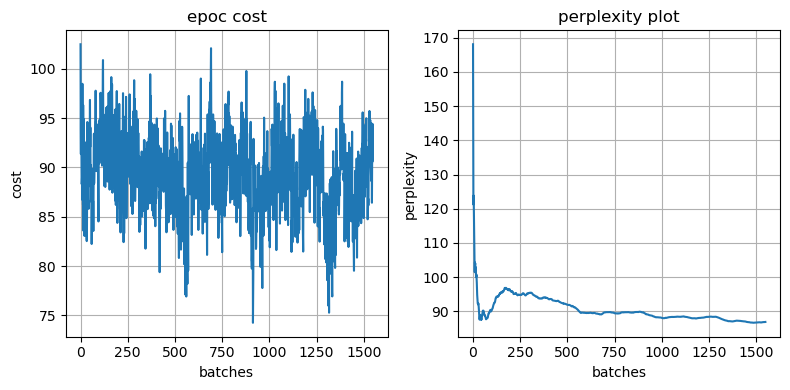

epoc 7 begins
epoc 7 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.5>
perplexity is 166.20431518554688
perplexity is 79.55709075927734
perplexity is 73.95693969726562
perplexity is 70.75785064697266
epoc 7 completed
epoc 7 final perplexity is 70.71869659423828


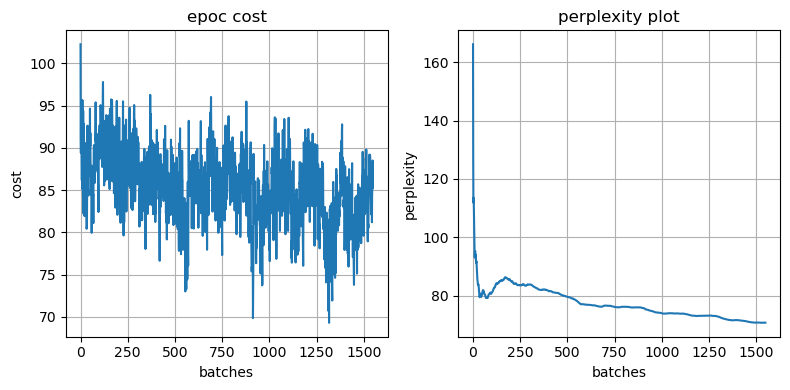

epoc 8 begins
epoc 8 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.25>
perplexity is 138.7488250732422
perplexity is 68.82975006103516
perplexity is 63.75444030761719
perplexity is 60.5216178894043
epoc 8 completed
epoc 8 final perplexity is 60.42856216430664


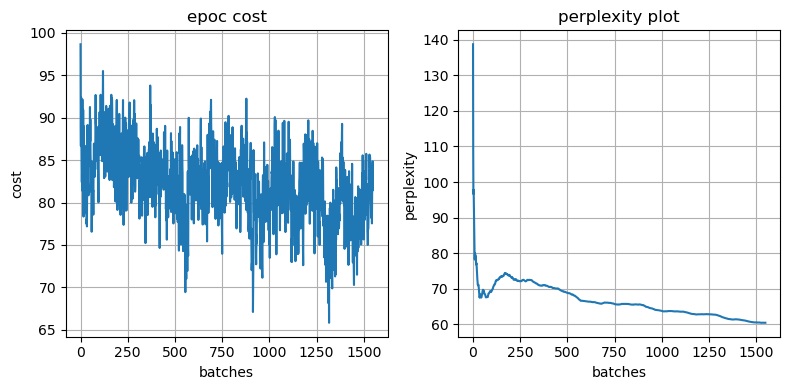

epoc 9 begins
epoc 9 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.125>
perplexity is 125.86649322509766
perplexity is 62.79212188720703
perplexity is 58.08997344970703
perplexity is 54.95465087890625
epoc 9 completed
epoc 9 final perplexity is 54.844966888427734


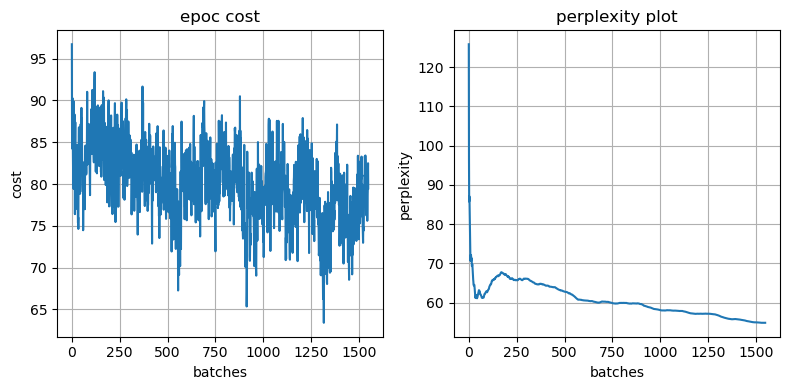

epoc 10 begins
epoc 10 learning rate is <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0625>
perplexity is 117.6193618774414
perplexity is 59.43749237060547
perplexity is 55.04033279418945
perplexity is 51.995880126953125
epoc 10 completed
epoc 10 final perplexity is 51.88639450073242


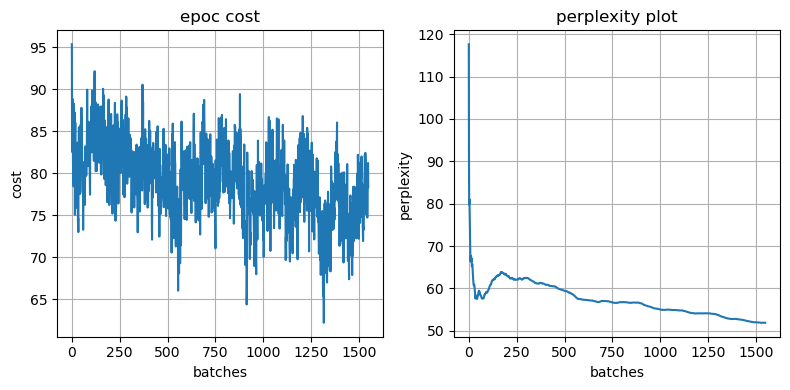

9853.242502689362


In [38]:
step_size=20
K = tf.keras.backend 
learning_rate=1.0
max_grad_norm=7
decay=0.5
max_epoch_decay_lr=5
start=time.time()
train(10)
finish=time.time()
total=finish-start
print(total)

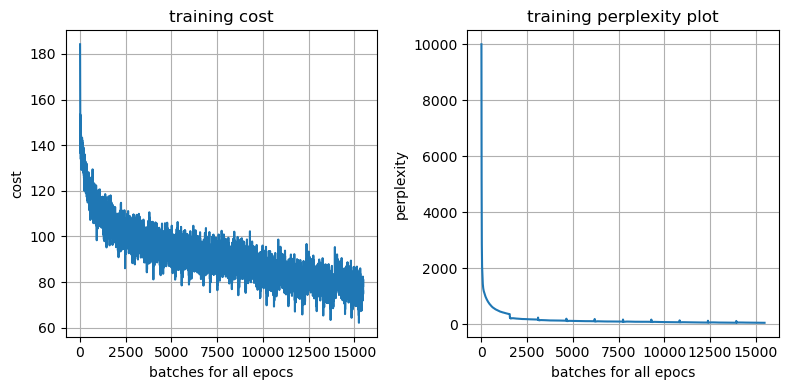

In [40]:
#plot training loss and perplexity
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[ 0].plot(np.array(train_epoc_cost_list))
axes[ 0].set_title('training cost')
axes[ 0].set_xlabel('batches for all epocs')
axes[ 0].set_ylabel('cost')
axes[ 0].grid(True)
        
axes[ 1].plot(np.array(train_perplexity_list))
axes[ 1].set_title('training perplexity plot')
axes[ 1].set_xlabel('batches for all epocs')
axes[ 1].set_ylabel('perplexity')
axes[ 1].grid(True)
            
            
plt.tight_layout()
plt.show()

now lets test our model on testing set

In [47]:
test_epoc_cost_list=[]
test_perplexity_list=[]
couter=0
epoc_cost=0
itter=0
test_itter=loader(test_va_sen_no, 30, 20)
for batch in test_itter:
    x=batch[0]
    y=batch[1]
    
    prob = model(x)
    loss  = crossentropy(y, prob)
    batch_cost= tf.reduce_sum(loss) / batch_size
    test_epoc_cost_list.append(batch_cost)
    
    epoc_cost+=batch_cost
    itter+=20
    #calculate perplexity
    perplexity= np.exp(epoc_cost/itter)
    test_perplexity_list.append(perplexity)
    #print perplexity at every 100 batches
    if couter % 100==0:
        print('perplexity is {}'.format(perplexity))
    couter+=1

perplexity is 4667.53857421875
perplexity is 5338.91650390625


In [64]:
sample=loader(test_va_sen_no, 30, 20).__next__()
x, y =sample[0], sample[1]
prob=model(x)
yhat=np.argmax(prob[4,0:20], axis=1)
yhat

array([  7,  20,   9,   3, 115,   0,  10,   0,  53,  50,  10,  15,   0,
         1,   1, 216,   0,   1,   1,   7])

In [65]:
y[4]

array([ 118, 5609,   12,    0,    2,  677,    7,    0,   64,  282, 4182,
         17,    6,  741,   47,  174,    8,    1,  767,  285], dtype=int32)

In [66]:
np.reshape(id_to_word(test_val_word_to_id, yhat), (1, -1))

array([['in', 'with', "'s", 'N', 'cents', '<unk>', 'that', '<unk>',
        'been', 'than', 'that', 'it', '<unk>', 'the', 'the', 'cash',
        '<unk>', 'the', 'the', 'in']], dtype='<U5')

In [67]:
np.reshape(id_to_word(test_val_word_to_id, y[4]), (1, -1))

array([['price', 'retreat', 'is', '<unk>', '<eos>', 'beginning', 'in',
        '<unk>', 'prices', 'began', 'accelerating', 'as', 'a', 'growing',
        'u.s.', 'economy', 'and', 'the', 'weak', 'dollar']], dtype='<U12')